In [ ]:
!pip install catboost

     |████████████████████████████████| 64.4MB 52kB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from catboost import CatBoostRegressor

In [ ]:

import sys
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize

import matplotlib.pyplot as plt
import datetime
%pylab inline
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

Populating the interactive namespace from numpy and matplotlib


In [ ]:
def dateparse (datetime):    
    return pd.Timestamp(datetime)
data = pd.read_csv('/content/drive/My Drive/CL_megafon_Cup IT_2020_final_data (1).csv', sep = ';', parse_dates = ['time_start', 'time_end'], date_parser=dateparse)


In [ ]:
coords = data.drop(['time_start', 'time_end'], axis=1)

In [ ]:
coords = coords.groupby(['place_latitude', 'place_longitude']).size().reset_index(name='count')

In [ ]:
cluster_coords = coords.as_matrix(columns=['place_latitude', 'place_longitude'])

In [ ]:
coords207 = data.drop(['time_start', 'time_end'], axis=1)
coords207 = data.groupby(['place_latitude', 'place_longitude']).size().reset_index(name='count')
cluster_coords207 = coords207.as_matrix(columns=['place_latitude', 'place_longitude'])
kms_per_radian = 6371.0088
epsilon = 5 / kms_per_radian
start_time = time.time()
X = np.radians(cluster_coords207)
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(cluster_coords207))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters207 = pd.Series([cluster_coords207[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 922


In [ ]:

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


In [ ]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

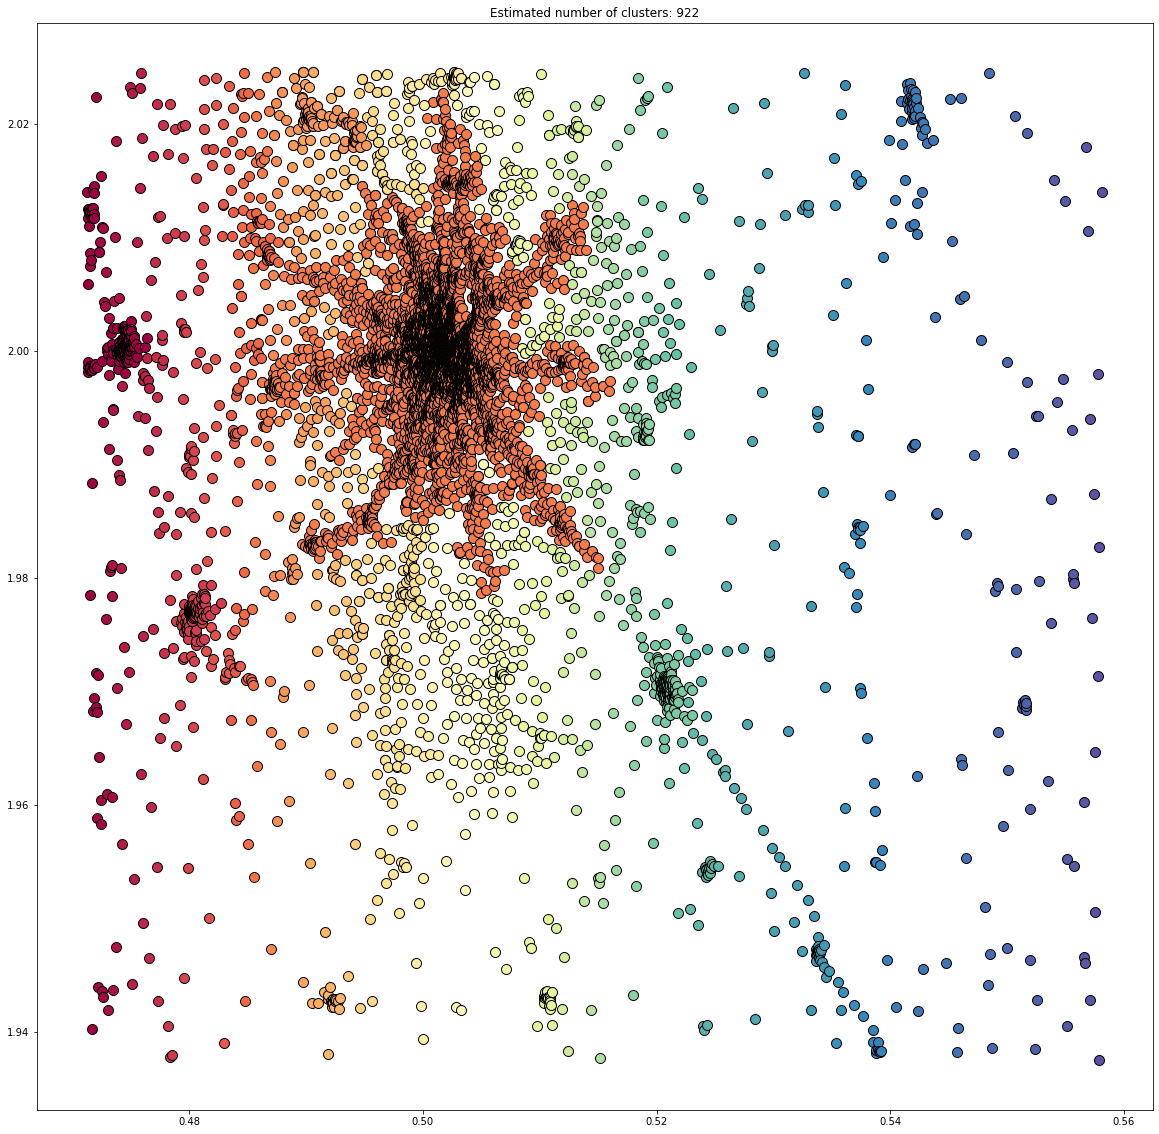

In [ ]:
unique_labels = set(cluster_labels)
plt.figure(1, figsize=(20, 20))
plt.clf()
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = (cluster_labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

plt.title('Estimated number of clusters: %d' % num_clusters)
plt.show()

In [ ]:
clustered = [0, 0, 0]
i = 1;
for cluster in clusters:
  for coord in cluster:
    coord = np.append(coord, [i])
    clustered = np.vstack((clustered, coord))
  i+=1



In [ ]:
clustered = clustered.T
cols = ['place_latitude', 'place_longitude', 'cluster']
clustered = pd.DataFrame({
    'place_latitude':clustered[0],
    'place_longitude':clustered[1],
    'cluster':clustered[2]
})

In [ ]:
clustered_data = data.merge(clustered, on = ['place_latitude', 'place_longitude'])
clustered_data

,time_start,time_end,place_latitude,place_longitude,cluster
0,2019-08-24 14:23:56,2019-08-24 18:54:47,28.102908,113.617867,207.0
1,2018-06-19 08:56:22,2018-06-19 12:15:26,28.102908,113.617867,207.0
2,2018-08-29 14:00:32,2018-08-29 14:37:51,28.102908,113.617867,207.0
3,2019-12-10 16:01:26,2019-12-10 16:35:22,28.102908,113.617867,207.0
4,2019-12-10 13:39:42,2019-12-10 17:58:22,28.999495,115.167583,207.0
...,...,...,...,...,...
78218,2018-06-25 11:25:04,2018-06-25 14:39:32,28.945221,114.357402,207.0
78219,2018-04-06 10:07:13,2018-04-06 16:34:40,28.619318,114.397573,207.0
78220,2018-07-13 22:59:34,2018-07-14 00:05:50,28.619318,114.397573,207.0
78221,2018-11-06 00:05:57,2018-11-06 08:50:10,28.619318,114.397573,207.0


In [ ]:
Cluster207 = clustered_data[clustered_data['cluster']==207]

In [ ]:
Cluster207


,time_start,time_end,place_latitude,place_longitude,cluster
0,2019-08-24 14:23:56,2019-08-24 18:54:47,28.102908,113.617867,207.0
1,2018-06-19 08:56:22,2018-06-19 12:15:26,28.102908,113.617867,207.0
2,2018-08-29 14:00:32,2018-08-29 14:37:51,28.102908,113.617867,207.0
3,2019-12-10 16:01:26,2019-12-10 16:35:22,28.102908,113.617867,207.0
4,2019-12-10 13:39:42,2019-12-10 17:58:22,28.999495,115.167583,207.0
...,...,...,...,...,...
78218,2018-06-25 11:25:04,2018-06-25 14:39:32,28.945221,114.357402,207.0
78219,2018-04-06 10:07:13,2018-04-06 16:34:40,28.619318,114.397573,207.0
78220,2018-07-13 22:59:34,2018-07-14 00:05:50,28.619318,114.397573,207.0
78221,2018-11-06 00:05:57,2018-11-06 08:50:10,28.619318,114.397573,207.0


In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
coords207 = Cluster207.drop(['time_start', 'time_end'], axis=1)
coords207 = Cluster207.groupby(['place_latitude', 'place_longitude']).size().reset_index(name='count')
cluster_coords207 = coords207.as_matrix(columns=['place_latitude', 'place_longitude'])
kms_per_radian = 30000
epsilon = 10 / kms_per_radian
start_time = time.time()
X = np.radians(cluster_coords207)
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(cluster_coords207))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters207 = pd.Series([cluster_coords207[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 685


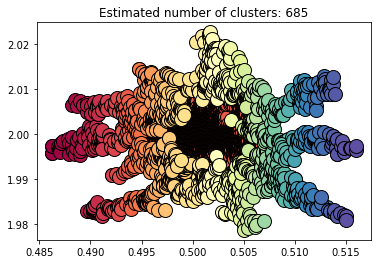

In [ ]:
unique_labels = set(cluster_labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = (cluster_labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % num_clusters)
plt.show()

In [ ]:
clustered207 = [0, 0, 0]
i = 923;
for cluster in clusters207:
  for coord in cluster:
    coord = np.append(coord, [i])
    clustered207 = np.vstack((clustered207, coord))
  i+=1

In [ ]:
clustered207 = clustered207.T
cols = ['place_latitude', 'place_longitude', 'cluster']
clustered207 = pd.DataFrame({
    'place_latitude':clustered207[0],
    'place_longitude':clustered207[1],
    'cluster':clustered207[2]
})

In [ ]:
clustered_data = data.merge(clustered207, on = ['place_latitude', 'place_longitude'])
clustered_data

,time_start,time_end,place_latitude,place_longitude,cluster
0,2019-08-24 14:23:56,2019-08-24 18:54:47,28.102908,113.617867,953.0
1,2018-06-19 08:56:22,2018-06-19 12:15:26,28.102908,113.617867,953.0
2,2018-08-29 14:00:32,2018-08-29 14:37:51,28.102908,113.617867,953.0
3,2019-12-10 16:01:26,2019-12-10 16:35:22,28.102908,113.617867,953.0
4,2019-12-10 13:39:42,2019-12-10 17:58:22,28.999495,115.167583,1383.0
...,...,...,...,...,...
43446,2018-06-25 11:25:04,2018-06-25 14:39:32,28.945221,114.357402,1035.0
43447,2018-04-06 10:07:13,2018-04-06 16:34:40,28.619318,114.397573,1035.0
43448,2018-07-13 22:59:34,2018-07-14 00:05:50,28.619318,114.397573,1035.0
43449,2018-11-06 00:05:57,2018-11-06 08:50:10,28.619318,114.397573,1035.0


In [ ]:
data.index = data['time_start']
data["year"] = data.index.year
data["month"] = data.index.month
data["weekday"] = data.index.weekday
data["hour"] = data.index.hour
data["minute"] = data.index.minute
data['duration'] = data['time_end'] - data['time_start']
data['min']= data['duration'].dt.seconds/60

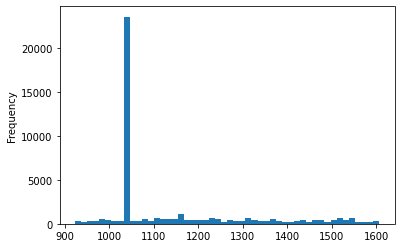

In [ ]:
clustered_data['cluster'].plot(kind='hist', bins = 50)

In [ ]:
X = clustered_data.drop(['time_end', 'min', 'duration'], axis = 1)
y = clustered_data['min']

In [ ]:
params = {'loss_function':'MAE', 'learning_rate':1, 'depth':10}
model = CatBoostRegressor(iterations=10000,  **params, task_type='GPU')
model.fit(X, y)

In [ ]:
y_true = np.array(data['min']) 
y_pred = model.predict(X)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return 100 * (np.sum(np.abs((y_true - y_pred) / y_true))/len(y_true))

In [ ]:
mean_absolute_percentage_error(y_true, y_pred)

148.07111382572424

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
new_data = data[['place_latitude', 'place_longitude']].copy()

In [ ]:
clustering = MeanShift(bandwidth = 0.1, n_jobs=-1).fit(new_data)

In [ ]:
new_data['class'] = clustering.predict(new_data)

In [ ]:
data['class'] = new_data['class']

In [ ]:
X = data.drop(['time_end', 'min', 'duration'], axis = 1)
y = data['min']

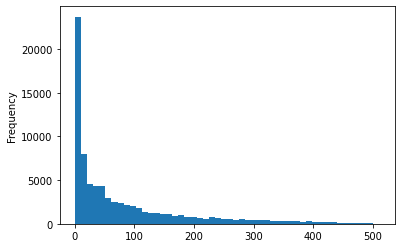

In [ ]:
data['class'].plot(kind='hist', bins = 50)

In [ ]:
params = {'loss_function':'MAE', 'learning_rate':1, 'depth':10}
model = CatBoostRegressor(iterations=10000,  **params, task_type='GPU')
model.fit(X, y)

Streaming output truncated to the last 5000 lines.
5001:	learn: 149.5938151	total: 43.5s	remaining: 43.5s
5002:	learn: 149.5921916	total: 43.5s	remaining: 43.5s
5003:	learn: 149.5900183	total: 43.5s	remaining: 43.4s
5004:	learn: 149.5881263	total: 43.5s	remaining: 43.4s
5005:	learn: 149.5854928	total: 43.5s	remaining: 43.4s
5006:	learn: 149.5836774	total: 43.5s	remaining: 43.4s
5007:	learn: 149.5817598	total: 43.5s	remaining: 43.4s
5008:	learn: 149.5798550	total: 43.6s	remaining: 43.4s
5009:	learn: 149.5776306	total: 43.6s	remaining: 43.4s
5010:	learn: 149.5759815	total: 43.6s	remaining: 43.4s
5011:	learn: 149.5738721	total: 43.6s	remaining: 43.4s
5012:	learn: 149.5723764	total: 43.6s	remaining: 43.4s
5013:	learn: 149.5700881	total: 43.6s	remaining: 43.4s
5014:	learn: 149.5682472	total: 43.6s	remaining: 43.3s
5015:	learn: 149.5665981	total: 43.6s	remaining: 43.3s
5016:	learn: 149.5641435	total: 43.6s	remaining: 43.3s
5017:	learn: 149.5625328	total: 43.6s	remaining: 43.3s
5018:	learn: 1

In [ ]:
def prepareData(data, lag_start, lag_end, test_size):

    data = pd.DataFrame(data.copy())

    test_index = int(len(data)*(1-test_size))

    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data['min'].shift(i)
    
    #data['year_average'] = list(map(code_mean(data[:test_index], 'year', 'min').get, data.year))
    #data['month_average'] = list(map(code_mean(data[:test_index], 'month', 'min').get, data.month))
    #data['weekday_average'] = list(map(code_mean(data[:test_index], 'weekday', 'min').get, data.weekday))
    #data["hour_average"] = list(map(code_mean(data[:test_index], 'hour', 'min').get, data.hour))
    #data["minute_average"] = list(map(code_mean(data[:test_index], 'minute', 'min').get, data.minute))

    data.drop(['year', 'month', 'weekday', 'hour', 'minute'], axis=1, inplace=True)
    data = data.dropna()
    data = data.reset_index(drop=True)

    X_train = data.loc[:test_index].drop(['min'], axis=1)
    y_train = data.loc[:test_index]['min']
    X_test = data.loc[test_index:].drop(['min'], axis=1)
    y_test = data.loc[test_index:]['min']

    return X_train, X_test, y_train, y_test

In [ ]:
y_true = np.array(data['min']) 
y_pred = model.predict(X)
mean_absolute_percentage_error(y_true, y_pred)

105.37909085002187

In [ ]:
data

,time_start,time_end,place_latitude,place_longitude
0,2019-08-24 14:23:56,2019-08-24 18:54:47,28.102908,113.617867
1,2018-06-19 08:56:22,2018-06-19 12:15:26,28.102908,113.617867
2,2018-08-29 14:00:32,2018-08-29 14:37:51,28.102908,113.617867
3,2019-12-10 16:01:26,2019-12-10 16:35:22,28.102908,113.617867
4,2019-12-10 13:39:42,2019-12-10 17:58:22,28.999495,115.167583
...,...,...,...,...
78218,2018-06-25 11:25:04,2018-06-25 14:39:32,28.945221,114.357402
78219,2018-04-06 10:07:13,2018-04-06 16:34:40,28.619318,114.397573
78220,2018-07-13 22:59:34,2018-07-14 00:05:50,28.619318,114.397573
78221,2018-11-06 00:05:57,2018-11-06 08:50:10,28.619318,114.397573


In [ ]:
X_train, X_test, y_train, y_test = prepareData(data, test_size=0.2, lag_start=12, lag_end=48)
lr = CatBoostRegressor(iterations=10000,  **params, task_type='GPU')
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
plt.figure(figsize=(15, 7))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression for one cluster\n MAPE: {}".format(1 - mean_absolute_error(prediction, y_test)/y_test.mean()))
plt.grid(True);

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [ ]:
X = data[['place_latitude', 'place_longitude']].copy()

# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X, 30, include_self=False)

In [ ]:
for connectivity in (None, knn_graph):
    for n_clusters in (30, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average',
                                         'complete',
                                         'ward',
                                         'single')):
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_,
                        cmap=plt.cm.nipy_spectral)
            plt.title('linkage=%s\n(time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)


plt.show()

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
new_data = data[['place_latitude', 'place_longitude']].copy()
new_data

,place_latitude,place_longitude
0,28.102908,113.617867
1,28.102908,113.617867
2,28.102908,113.617867
3,28.102908,113.617867
4,28.999495,115.167583
...,...,...
78218,28.945221,114.357402
78219,28.619318,114.397573
78220,28.619318,114.397573
78221,28.619318,114.397573


In [ ]:
%%time
clustering = MeanShift(bandwidth = 0.08, n_jobs=-1).fit(new_data)

CPU times: user 21.7 s, sys: 1.85 s, total: 23.6 s
Wall time: 4min 44s


In [ ]:
len(np.unique(clustering.predict(new_data)))

675

In [ ]:
labels = clustering.labels_
cluster_centers = clustering.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 675


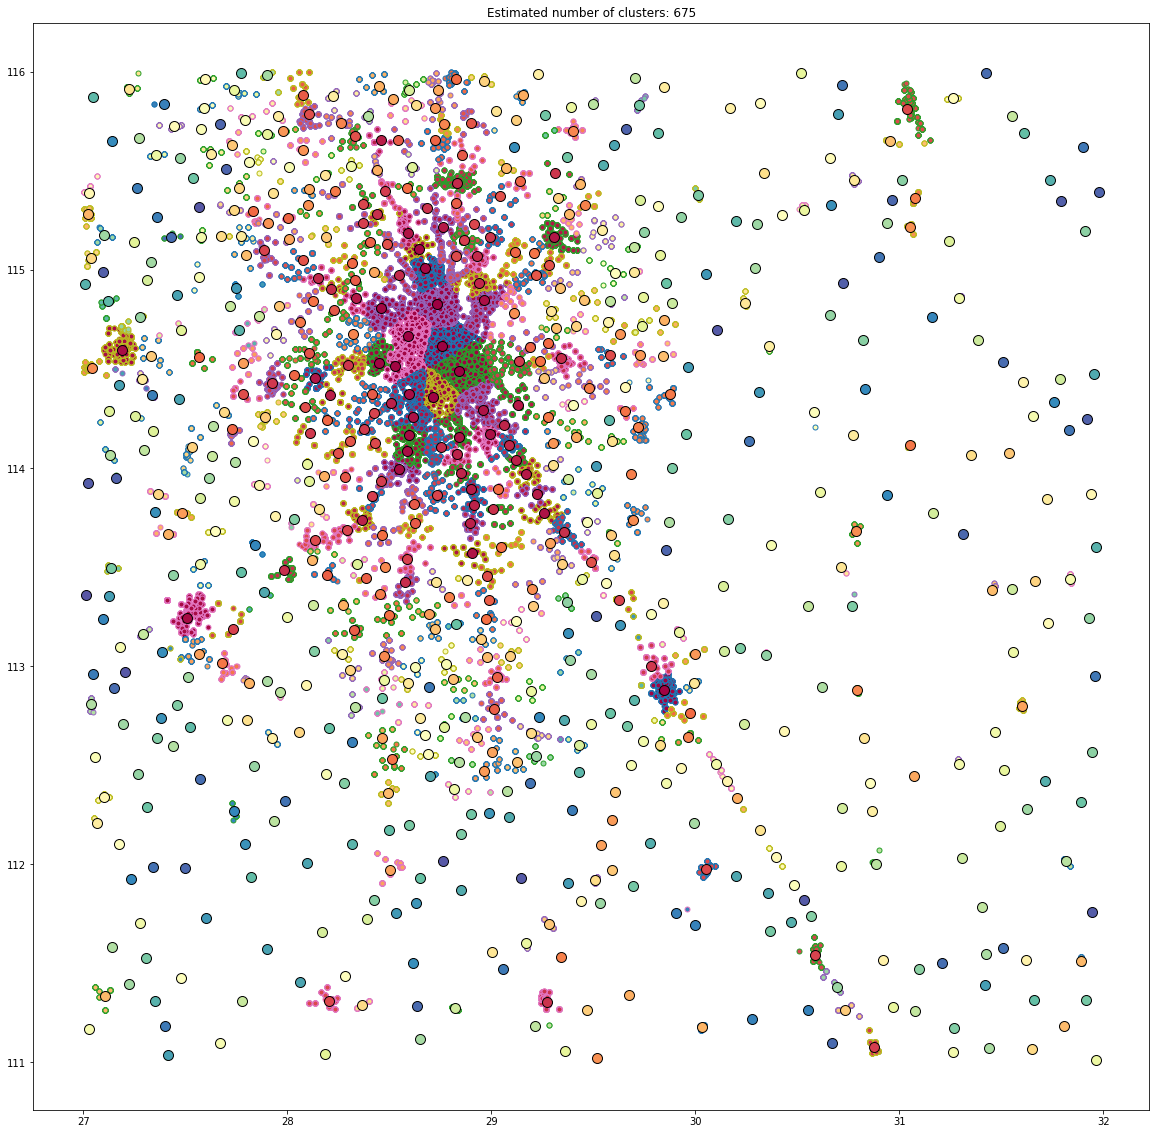

In [ ]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1, figsize=(20, 20))
plt.clf()

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(range(n_clusters_), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    plt.plot(np.array(new_data)[my_members, 0], np.array(new_data)[my_members, 1],'o', markerfacecolor=col,markersize=5)
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=10)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array(new_data)
kmeans = KMeans(n_clusters=900, random_state=0).fit(X)
kmeans.labels_
kmeans.predict(np.array(new_data))

array([758, 758, 758, ..., 250, 250, 250], dtype=int32)

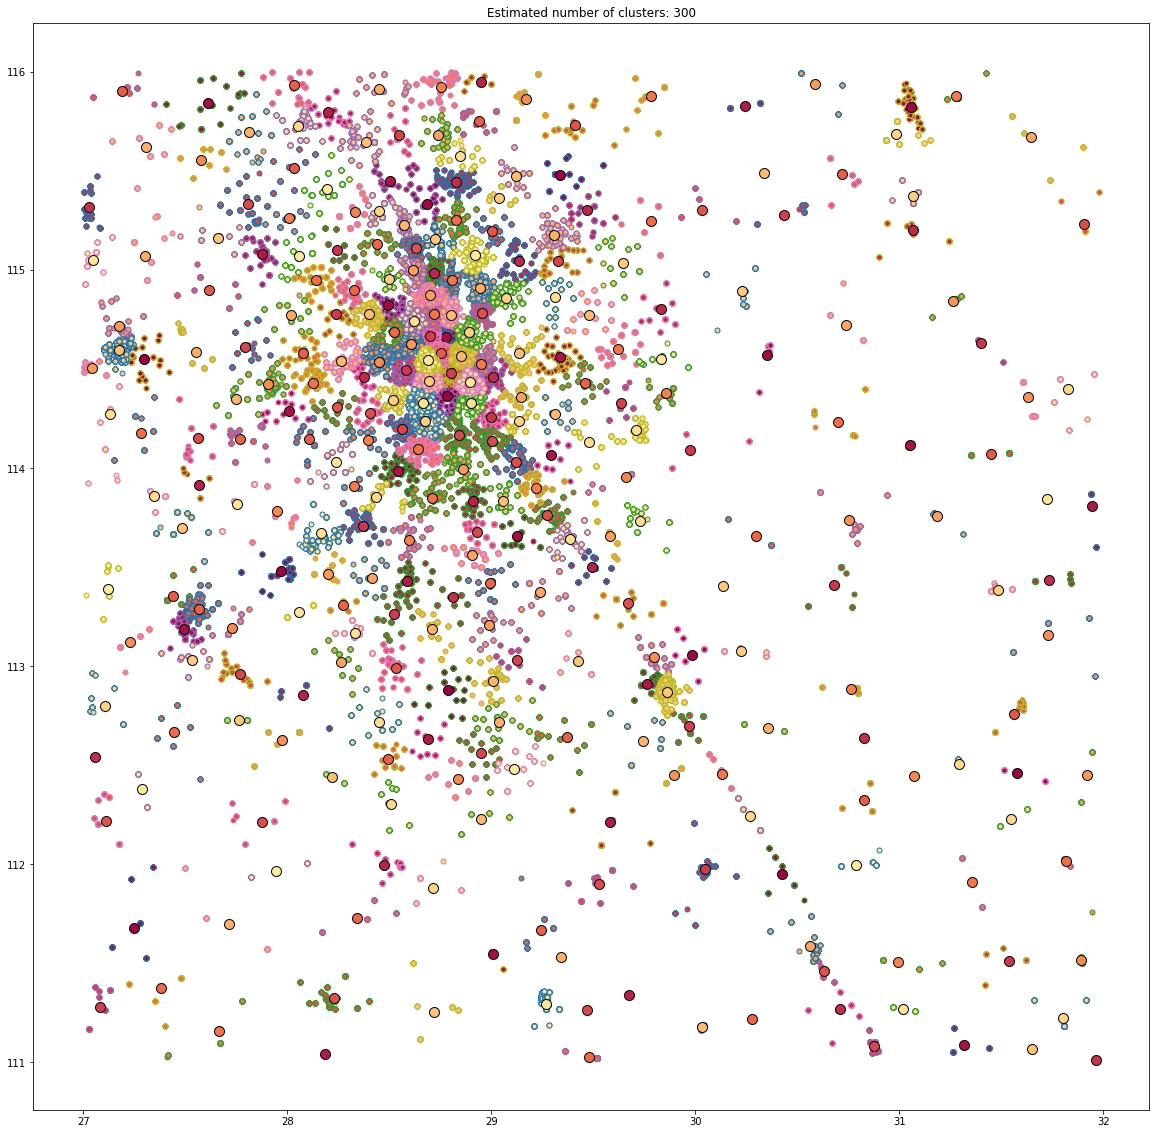

In [ ]:
plt.figure(1, figsize=(20, 20))
plt.clf()
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(range(n_clusters_), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    plt.plot(np.array(new_data)[my_members, 0], np.array(new_data)[my_members, 1],'o', markerfacecolor=col,markersize=5)
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=10)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()